# Marvel Cinematic Universe Data Analysis

Some of the MCU movies are re-released in my country due to the coronavirus.<br>
And Yes, i am in the BIG fangirling mode again. <br>
After going through some marathon, i was just thinking... : Okay, maybe it would be fun if i do some data analysis with it. <br>
I was trying to answer following questions...

* Which main actor made the most profit in total?
* Which movie's cast is the most gender equal?
    
Here is the index. <br>
1. Examine the data
    * Movie database 
    * Cast database (optional)
2. Data cleaning
    * Treat the missing data
    * Make it clean!
3. Feature Engineering
    * Get geocodes & countries of the filming locations
    * Get ROI & profit in dollars
    * Get actors' genders using gender_guesser
4. Data analysis
    * How is the distribution on released date & running time?
    * On where was the movie shooted the most? 
    * Which movie had most collections & ROI?
    * Which actor starred the most as the main cast?
    * How is the gender distribution of the lead characters?

So, shall we start?

![lemme start with thor's godlike face](https://media.giphy.com/media/l1J9Kgcw47UuavsOc/giphy.gif)


## 1. Examine the data

First, We will gonna see how the dataset looks like. <br>
*I got the full dataset of mcu movies from kaggle. Thanks mate.

https://www.kaggle.com/promptcloud/all-marvel-cinematic-universe-movies-on-imdb#imdb_com_movie_data_promotion_promptcloud_master_deduped_n-20190529_123020337730168__0%202.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mcu.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            24 non-null     object 
 1   Crawl Timestamp    24 non-null     object 
 2   Pageurl            24 non-null     object 
 3   Title              24 non-null     object 
 4   Genres             22 non-null     object 
 5   Release Date       23 non-null     object 
 6   Movie Rating       22 non-null     object 
 7   Review Rating      22 non-null     float64
 8   Movie Run Time     22 non-null     object 
 9   Plot               24 non-null     object 
 10  Cast               22 non-null     object 
 11  Language           24 non-null     object 
 12  Filming Locations  23 non-null     object 
 13  Budget             21 non-null     object 
 14  Collection         22 non-null     object 
 15  Collection Date    4 non-null      object 
dtypes: float64(1), object(15)
me

In [3]:
display(df.head())

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN


In [4]:
df.nunique()

Uniq Id              24
Crawl Timestamp      24
Pageurl              24
Title                24
Genres                6
Release Date         23
Movie Rating          1
Review Rating        13
Movie Run Time       17
Plot                 24
Cast                 21
Language             12
Filming Locations    15
Budget               13
Collection           22
Collection Date       4
dtype: int64

O-kay... seems like we have 16 colums and some of the values are empty.. <br>
And it looks like a lot of the columns need processing. <br>
We can defitenly drop the Uniq Id, collection date column & crawl timestamp though.<br>
Also, we will drop Movie Rating column because all values are the same (PG-13).<br>
Also, we can just drop the row with Guardians of Galaxy 3 becuase it's not release yet & barely has any information.

## 2. Data Cleaning
In this step, we'll do the following things:
1. Treat the missing values
2. Make it clean!

### 2-1 Treat the missing values

In [5]:
df = df.drop(columns= ["Uniq Id","Crawl Timestamp","Collection Date", "Movie Rating"])
df = df.drop([0], axis=0)

print(df.isnull().sum())

Pageurl              0
Title                0
Genres               1
Release Date         0
Review Rating        1
Movie Run Time       1
Plot                 0
Cast                 1
Language             0
Filming Locations    0
Budget               2
Collection           1
dtype: int64


Cool, it's better now... except that it is not. <br>
Seems like there are some null values still..
Let's find out by printing them.

In [6]:
display(df[df.Genres.isnull()])
display(df[df.Budget.isnull()])

print("Null values in the dataframe without these 2 movies:")
#print(df.drop([6,10], axis=0).info())
df.drop([6,10]).isnull().sum()

,Pageurl,Title,Genres,Release Date,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection
10,https://www.imdb.com/title/tt6320628/,Spider-Man: Far from Home (2019) - IMDb,NaN,2 July 2019 (USA),NaN,NaN,"Directed by Jon Watts. With Zendaya, Tom Holla...",NaN,English,"Hertfordshire, England, UK",NaN,NaN


,Pageurl,Title,Genres,Release Date,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection
6,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,"
10,https://www.imdb.com/title/tt6320628/,Spider-Man: Far from Home (2019) - IMDb,NaN,2 July 2019 (USA),NaN,NaN,"Directed by Jon Watts. With Zendaya, Tom Holla...",NaN,English,"Hertfordshire, England, UK",NaN,NaN


Null values in the dataframe without these 2 movies:


Pageurl              0
Title                0
Genres               0
Release Date         0
Review Rating        0
Movie Run Time       0
Plot                 0
Cast                 0
Language             0
Filming Locations    0
Budget               0
Collection           0
dtype: int64

It turns out only 2 movies (Captain Marvel and Spider-Man:Far From Home) has some empty valus.<br>
Luckily, it seems like we can fill out these values by googling.

In [7]:
df.loc[6,"Budget"] =  "$152,000,000"
#https://variety.com/2019/film/news/captain-marvel-box-office-opening-thursday-1203158181/

df.loc[10, "Genres"] = 'Action | Adventure | Sci-Fi'
df.loc[10, "Review Rating"] = 7.5
df.loc[10, "Movie Run Time"] = '129 min'
df.loc[10, "Cast"] = 'Tom Holland|Samuel L. Jackson|Jake Gyllenhaal|Marisa Tomei'
df.loc[10, "Budget"] = '$160,000,000'
df.loc[10, "Collection"] = '$1,132,000,000'
#https://www.imdb.com/title/tt6320628/

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pageurl            23 non-null     object 
 1   Title              23 non-null     object 
 2   Genres             23 non-null     object 
 3   Release Date       23 non-null     object 
 4   Review Rating      23 non-null     float64
 5   Movie Run Time     23 non-null     object 
 6   Plot               23 non-null     object 
 7   Cast               23 non-null     object 
 8   Language           23 non-null     object 
 9   Filming Locations  23 non-null     object 
 10  Budget             23 non-null     object 
 11  Collection         23 non-null     object 
dtypes: float64(1), object(11)
memory usage: 3.0+ KB


None

### 2-2 Make it clean!

Cool. We successfully filled out the empty values - Now it's time to rightfully process the column values. <br>
First, let's examine the dataset again.

In [8]:
df.head()

,Pageurl,Title,Genres,Release Date,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection
1,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,"
2,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600"
3,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259"
4,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994"
5,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551"


Okay... let's think for a minute. <br>
First, It will be better to change the column names to simpler ones.

In [9]:
df.columns = map(str.lower, df.columns)
df = df.rename(columns={"pageurl":"url", "release date":"date", "review rating":"score", "movie run time":"runtime", "plot":"plots",
                   "filming locations":"locations"})
print(df.columns)

Index(['url', 'title', 'genres', 'date', 'score', 'runtime', 'plots', 'cast',
       'language', 'locations', 'budget', 'collection'],
      dtype='object')


Also, The following things needs to be done for cleansing data.

---
Title -> drop the '(year) - IMDb' part.<br>
Genres -> replace '|' to ',' <br>
Release Date -> drop the (USA) part and covert the string to datetime. <br>
Movie Run time -> drop "min" part and convert the string to int. <br>
Plot -> We can extract the 'Directed by ~.' sentence and make it to another column. <br>
Cast -> seperate them into multiple columns (1st cast, 2nd cast..) <br>
Language -> replace '|' to ',' <br>
Filming Locations -> Maybe we can convert them into coordiates?  <br>
Budget & Collection -> remove "$" and "," and convert them into int value. Also we can create a profit column by 
calculating these columns.

----
After this, we will sort the movies by releasing date and reset index. 

In [10]:
from datetime import datetime
import re 

def cleaning_df(df):
    clean_df = df.copy()
    clean_df.title = df.title.str.split(" \(").str[0]
    clean_df.genres = df.genres.str.replace('|',',')
    clean_df.date = df.date.str.split(" \(").str[0]
    clean_df.date= pd.to_datetime(df.date.str.split(" \(").str[0])
    clean_df.runtime = df.runtime.str.split(" min").str[0].astype(int)
    clean_df.language = df.language.str.replace('|',',')
    clean_df.budget = df.budget.str.replace('$',"").str.replace(",","").astype(int)
    clean_df.collection = df.collection.str.replace('$',"").str.replace(",","").astype(int)
    
    for i in range(clean_df.cast.count()):
        clean_df.loc[i+1, "actor_1"] = df.loc[i+1, "cast"].split("|")[0]
        clean_df.loc[i+1, "actor_2"] = df.loc[i+1, "cast"].split("|")[1]
        clean_df.loc[i+1, "actor_3"] = df.loc[i+1, "cast"].split("|")[2]
        clean_df.loc[i+1, "actor_4"] = df.loc[i+1, "cast"].split("|")[3]
    
    for i in range(clean_df.plots.count()):
        m = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', df.loc[i+1,"plots"])
        director = re.search('Directed by (.+?)\.', m[0]).group(1)
        plots = m[-1] # not 100% accurate. has to drop the sentence with "With~"
        clean_df.loc[i+1,"director"] = director
        clean_df.loc[i+1,"story"] = plots
    
    clean_df = clean_df.sort_values("date")
    clean_df = clean_df.reset_index()
    clean_df = clean_df.drop(columns= ["plots","cast","url", "index"], axis=1)
    return clean_df

clean_df = cleaning_df(df)

display(clean_df.head())

,title,genres,date,score,runtime,language,locations,budget,collection,actor_1,actor_2,actor_3,actor_4,director,story
0,Iron Man,"Action,Adventure,Sci-Fi",2008-05-02,7.9,126,"English,Persian,Urdu,Arabic,Hungarian","Palmdale Regional Airport, Palmdale, Californi...",140000000,585174222,Robert Downey Jr.,Gwyneth Paltrow,Terrence Howard,Jeff Bridges,Jon Favreau,"After being held captive in an Afghan cave, bi..."
1,The Incredible Hulk,"Action,Adventure,Sci-Fi",2008-06-13,6.7,112,"English,Portuguese,Spanish","Cherry Street Bridge, Toronto, Ontario, Canada",150000000,263427551,Edward Norton,Liv Tyler,Tim Roth,William Hurt,Louis Leterrier,"Government, must find a cure for the monster h..."
2,Iron Man 2,"Action,Adventure,Sci-Fi",2010-05-07,7.0,124,"English,French,Russian","D.C. Stages, 1360 East 6th Street, Downtown, L...",200000000,623933331,Robert Downey Jr.,Mickey Rourke,Gwyneth Paltrow,Don Cheadle,Jon Favreau,With the world now aware of his identity as Ir...
3,Thor,"Action,Adventure,Fantasy,Sci-Fi",2011-05-06,7.0,115,English,"Galisteo, New Mexico, USA",150000000,449326618,Chris Hemsworth,Anthony Hopkins,Natalie Portman,Tom Hiddleston,Kenneth Branagh,The powerful but arrogant god Thor (Chris Hems...
4,Captain America: The First Avenger,"Action,Adventure,Sci-Fi",2011-07-22,6.9,124,"English,Norwegian,French","Stanley Dock, Liverpool, Merseyside, England, UK",140000000,370569774,Chris Evans,Hugo Weaving,Samuel L. Jackson,Hayley Atwell,Joe Johnston,But being Captain America comes at a price as ...


## 3. Feature Engineering

In this step, we'll do the following things:
1. Get geocodes & countries of the filming location using geopy.
2. Calculate profit and the ROI.
3. Get actors' genders using gender_guesser

### 3-1 Get geocodes

In [11]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [106]:
from geopy.geocoders import Nominatim
import time
from geopy.exc import GeocoderTimedOut

def get_geocodes(clean_df):
    locator = Nominatim(user_agent="myGeocoder")
    clean_df.locations = clean_df.locations.replace("D.C. Stages, 1360 East 6th Street, Downtown, Los Angeles, California, USA", 
                                                    "1360 E 6th St, Los Angeles, CA 90021, United States")
    clean_df.locations = clean_df.locations.replace("Shepperton Studios, Shepperton, Surrey, England, UK", 
                                                    "Studios Rd, Shepperton TW17 0QD, United Kingdom")
    clean_df.locations = clean_df.locations.replace("Pinewood Atlanta Studios, 461 Sandy Creek Road, Fayetteville, Georgia, USA", 
                                                    "461 Sandy Creek Rd, Fayetteville, GA 30214, United States")
    clean_df.locations = clean_df.locations.replace("Stanley Dock, Liverpool, Merseyside, England, UK", 
                                                    "Regent Rd, Liverpool L3 0AN, United Kingdom")
    clean_df.locations = clean_df.locations.replace("Palmdale Regional Airport, Palmdale, California, USA", 
                                                    "41000 20 St E, Palmdale, CA 93550, United States")
    for i in range(clean_df.locations.count()):
        try:
            location = locator.geocode(clean_df.loc[i, "locations"])
            if location != None:
                clean_df.loc[i, "longitude"] = location.longitude
                clean_df.loc[i, "latitude"] = location.latitude
        except GeocoderTimedOut as e:
            debug('retrying_set_location: geocoder exception ({}), retrying'.format(str(e)))
            
        #Fill Nans
        clean_df.loc[clean_df.title == 'Iron Man', "longitude"] = 118.0833
        clean_df.loc[clean_df.title == 'Iron Man', "latitude"] =34.6275
        
        clean_df.loc[clean_df.locations == "Studios Rd, Shepperton TW17 0QD, United Kingdom", "longitude"] = -0.4655 
        clean_df.loc[clean_df.locations == "Studios Rd, Shepperton TW17 0QD, United Kingdom", "latitude"] = 51.4068

        
        time.sleep(1.25) 
    return clean_df

clean_df = get_geocodes(clean_df)

In [107]:
def get_country(clean_df):
    clean_df["locations_country"] = clean_df.locations.str.split(",").str[-1].str.strip()
    clean_df.locations_country = clean_df["locations_country"].replace("United Kingdom","UK")
    clean_df.locations_country = clean_df["locations_country"].replace("United States","USA")
    return clean_df

clean_df = get_country(clean_df)

In [108]:
clean_df[['title','locations','locations_country','longitude','latitude']].head()

,title,locations,locations_country,longitude,latitude
0,Iron Man,"41000 20 St E, Palmdale, CA 93550, United States",USA,118.083300,34.627500
1,The Incredible Hulk,"Cherry Street Bridge, Toronto, Ontario, Canada",Canada,-79.348568,43.640840
2,Iron Man 2,"1360 E 6th St, Los Angeles, CA 90021, United S...",USA,-118.233847,34.038153
3,Thor,"Galisteo, New Mexico, USA",USA,-105.960457,35.394459
4,Captain America: The First Avenger,"Regent Rd, Liverpool L3 0AN, United Kingdom",UK,-3.000121,53.419796


### 3-2 Get profit & ROI

In [109]:
def get_profit(clean_df):
    clean_df["profit"] = clean_df.collection - clean_df.budget 
    clean_df["ROI"] = ((clean_df.collection / clean_df.budget)-1)*100
    return clean_df
clean_df = get_profit(clean_df)

In [110]:
clean_df[['budget','collection','profit','ROI']].head()

,budget,collection,profit,ROI
0,140000000,585174222,445174222,317.981587
1,150000000,263427551,113427551,75.618367
2,200000000,623933331,423933331,211.966666
3,150000000,449326618,299326618,199.551079
4,140000000,370569774,230569774,164.692696


### 3-3 Get actors' genders

Al-right. In this step, we will going to figure out the genders of all actors.  <br>
Of course you can use google, but there is a couple of useful tools that we can use. <br>
We'll gonna try 2 modules and compare their performances.

In [111]:
#Let's fist build the name database by ourselves..

def get_actors_name(clean_df):
    name_list = []
    for column in ["actor_1", "actor_2", "actor_3", "actor_4"]:
        for name in clean_df[column]:
            if name not in name_list:
                name_list.append(name)
    return sorted(name_list)

name_list = get_actors_name(clean_df)
print(name_list)

['Anthony Hopkins', 'Ben Mendelsohn', 'Benedict Cumberbatch', 'Benedict Wong', 'Bradley Cooper', 'Brie Larson', 'Cate Blanchett', 'Chadwick Boseman', 'Chiwetel Ejiofor', 'Chris Evans', 'Chris Hemsworth', 'Chris Pratt', 'Corey Stoll', 'Danai Gurira', 'Dave Bautista', 'Don Cheadle', 'Edward Norton', 'Evangeline Lilly', 'Guy Pearce', 'Gwyneth Paltrow', 'Hayley Atwell', 'Hugo Weaving', 'Jake Gyllenhaal', 'Jeff Bridges', 'Jeremy Renner', 'Jude Law', 'Liv Tyler', "Lupita Nyong'o", 'Marisa Tomei', 'Mark Ruffalo', 'Michael B. Jordan', 'Michael Douglas', 'Michael Keaton', 'Michael Peña', 'Mickey Rourke', 'Natalie Portman', 'Paul Rudd', 'Rachel McAdams', 'Robert Downey Jr.', 'Robert Redford', 'Samuel L. Jackson', 'Scarlett Johansson', 'Sebastian Stan', 'Stellan Skarsgård', 'Terrence Howard', 'Tim Roth', 'Tom Hiddleston', 'Tom Holland', 'Vin Diesel', 'Walton Goggins', 'William Hurt', 'Zoe Saldana']


In [112]:
pip install gender_guesser

Note: you may need to restart the kernel to use updated packages.


In [113]:
from gender_detector import gender_detector as gd
detector = gd.GenderDetector('us') # It can also be ar, uk, uy.
for name in name_list[:10]:
    print(name, ":", detector.guess(name.split(" ")[0]))               

Anthony Hopkins : male
Ben Mendelsohn : male
Benedict Cumberbatch : male
Benedict Wong : male
Bradley Cooper : male
Brie Larson : female
Cate Blanchett : female
Chadwick Boseman : male
Chiwetel Ejiofor : unknown
Chris Evans : unknown


In [114]:
import gender_guesser.detector as gender
guesser = gender.Detector()
for name in name_list[:10]:
    print(name, ":", guesser.get_gender(name.split(" ")[0]))

Anthony Hopkins : male
Ben Mendelsohn : male
Benedict Cumberbatch : male
Benedict Wong : male
Bradley Cooper : male
Brie Larson : unknown
Cate Blanchett : female
Chadwick Boseman : male
Chiwetel Ejiofor : unknown
Chris Evans : mostly_male


In [115]:
detector_unknown = 0
guesser_unknown = 0

for name in name_list:
    if detector.guess(name.split(" ")[0]) == 'unknown':
        detector_unknown += 1
    if guesser.get_gender(name.split(" ")[0]) == 'unknown':
        guesser_unknown += 1
        
print("Detector Unknown:", detector_unknown) 
print("Guesser Unknown:", guesser_unknown)   

Detector Unknown: 8
Guesser Unknown: 2


Turns out the second one is more accurate. Let's just do some adjustment and make this to a dictionary.<br>
We will going to change "mostly_male" to "male", and fill the 2 "unknown" values to right genders by googling.

In [116]:
name_gender_dict = {}
for name in name_list:
    name_gender_dict[name] = guesser.get_gender(name.split(" ")[0])
    for k,v in name_gender_dict.items():
        if name_gender_dict[k] == 'mostly_male':
            name_gender_dict.update({k:"male"})
    name_gender_dict.update({"Chiwetel Ejiofor":"male","Brie Larson":"female"})
print(name_gender_dict)

{'Anthony Hopkins': 'male', 'Chiwetel Ejiofor': 'male', 'Brie Larson': 'female', 'Ben Mendelsohn': 'male', 'Benedict Cumberbatch': 'male', 'Benedict Wong': 'male', 'Bradley Cooper': 'male', 'Cate Blanchett': 'female', 'Chadwick Boseman': 'male', 'Chris Evans': 'male', 'Chris Hemsworth': 'male', 'Chris Pratt': 'male', 'Corey Stoll': 'male', 'Danai Gurira': 'female', 'Dave Bautista': 'male', 'Don Cheadle': 'male', 'Edward Norton': 'male', 'Evangeline Lilly': 'female', 'Guy Pearce': 'male', 'Gwyneth Paltrow': 'female', 'Hayley Atwell': 'female', 'Hugo Weaving': 'male', 'Jake Gyllenhaal': 'male', 'Jeff Bridges': 'male', 'Jeremy Renner': 'male', 'Jude Law': 'male', 'Liv Tyler': 'female', "Lupita Nyong'o": 'female', 'Marisa Tomei': 'female', 'Mark Ruffalo': 'male', 'Michael B. Jordan': 'male', 'Michael Douglas': 'male', 'Michael Keaton': 'male', 'Michael Peña': 'male', 'Mickey Rourke': 'male', 'Natalie Portman': 'female', 'Paul Rudd': 'male', 'Rachel McAdams': 'female', 'Robert Downey Jr.': 

Lastly, We wil create new columns representing the actors' genders to existing dataframe, using the dictionary we have just created.

In [117]:
#Let's assign this to the dataframe
def get_gender(clean_df):
    for i in range(clean_df.actor_1.count()):
        clean_df.loc[i, "actor_1_g"] = name_gender_dict[clean_df.loc[i, "actor_1"]]
        clean_df.loc[i, "actor_2_g"] = name_gender_dict[clean_df.loc[i, "actor_2"]]
        clean_df.loc[i, "actor_3_g"] = name_gender_dict[clean_df.loc[i, "actor_3"]]
        clean_df.loc[i, "actor_4_g"] = name_gender_dict[clean_df.loc[i, "actor_4"]]
    return clean_df
    
clean_df = get_gender(clean_df)

In [118]:
clean_df[['actor_1','actor_2','actor_3','actor_4','actor_1_g','actor_2_g','actor_3_g','actor_4_g']].head()

,actor_1,actor_2,actor_3,actor_4,actor_1_g,actor_2_g,actor_3_g,actor_4_g
0,Robert Downey Jr.,Gwyneth Paltrow,Terrence Howard,Jeff Bridges,male,female,male,male
1,Edward Norton,Liv Tyler,Tim Roth,William Hurt,male,female,male,male
2,Robert Downey Jr.,Mickey Rourke,Gwyneth Paltrow,Don Cheadle,male,male,female,male
3,Chris Hemsworth,Anthony Hopkins,Natalie Portman,Tom Hiddleston,male,male,female,male
4,Chris Evans,Hugo Weaving,Samuel L. Jackson,Hayley Atwell,male,male,male,female


## 4. Data Analytics

Cool...we have a cleaner dataset now. Was't that easy, huh? <br>
Now, we will see how the data is distributed with some basic statistics.<br>
Let's start this chapter with Starlord's dancing move.<br>

![dancing starlord](https://media.giphy.com/media/RtKl3EEM3hl4c/giphy.gif)

### How is the distribution of released date?

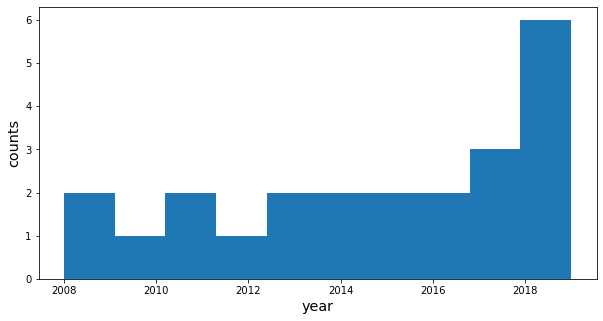

In [119]:
from pandas.plotting import register_matplotlib_converters
import datetime

pd.plotting.register_matplotlib_converters()
y = [date.year for date in clean_df.date]

plt.figure(figsize=(10,5))
plt.hist(y)
plt.xlabel('year', size= 'x-large')
plt.ylabel('counts', size= 'x-large')
plt.show()

### How is the distribution of the running times? Which movie is the longest or shortest?

In [120]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


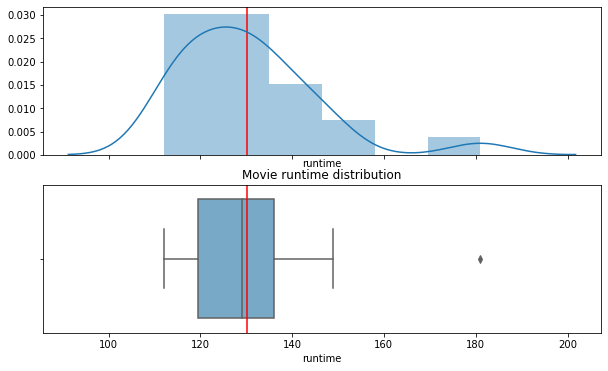

In [121]:
import plotly.graph_objects as go

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
plt.title("Movie runtime distribution",loc="center")

axes[0].axvline(np.mean(clean_df.runtime),color="r")
sns.distplot(clean_df.runtime, label="runtime",ax=axes[0])
axes[1].axvline(np.mean(clean_df.runtime),color="r")
sns.boxplot(clean_df.runtime, palette="Blues",ax=axes[1])

plt.show()

In [122]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=clean_df.runtime,boxmean='sd',marker_color='royalblue',name=""))

fig.show()

print("The shortest film(s) with ruuning time of",np.min(clean_df.runtime),"min")
print(clean_df.loc[clean_df.runtime==np.min(clean_df.runtime), "title"].values)
print("The longest film(s) with ruuning time of", np.max(clean_df.runtime),"min")
print(clean_df.loc[clean_df.runtime==np.max(clean_df.runtime), "title"].values)

The shortest film(s) with ruuning time of 112 min
['The Incredible Hulk' 'Thor: The Dark World']
The longest film(s) with ruuning time of 181 min
['Avengers: Endgame']


### On where was the movies shooted?

In [123]:
print(clean_df.locations_country.value_counts())

USA          16
UK            5
Australia     1
Canada        1
Name: locations_country, dtype: int64


In [124]:
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

map1 = folium.Map(
    location=[-20.338315,18.089960],
    #tiles='cartodbpositron',
    zoom_start=2,
)

clean_df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)

mc = MarkerCluster()

for row in clean_df.itertuples():
    print(row)
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude], 
                               popup = folium.Popup(row.title + "\n (" + row.locations +")", max_width=200)))
 
map1.add_child(mc)

map1

Pandas(Index=0, title='Iron Man', genres='Action,Adventure,Sci-Fi', date=Timestamp('2008-05-02 00:00:00'), score=7.9, runtime=126, language='English,Persian,Urdu,Arabic,Hungarian', locations='41000 20 St E, Palmdale, CA 93550, United States', budget=140000000, collection=585174222, actor_1='Robert Downey Jr.', actor_2='Gwyneth Paltrow', actor_3='Terrence Howard', actor_4='Jeff Bridges', director='Jon Favreau', story='After being held captive in an Afghan cave, billionaire engineer Tony Stark creates a unique weaponized suit of armor to fight evil.', longitude=118.0833, latitude=34.6275, locations_country='USA', profit=445174222, ROI=317.98158714285717, actor_1_g='male', actor_2_g='female', actor_3_g='male', actor_4_g='male')
Pandas(Index=1, title='The Incredible Hulk', genres='Action,Adventure,Sci-Fi', date=Timestamp('2008-06-13 00:00:00'), score=6.7, runtime=112, language='English,Portuguese,Spanish', locations='Cherry Street Bridge, Toronto, Ontario, Canada', budget=150000000, collec

In [125]:
clean_df

,title,genres,date,score,runtime,language,locations,budget,collection,actor_1,...,story,longitude,latitude,locations_country,profit,ROI,actor_1_g,actor_2_g,actor_3_g,actor_4_g
0,Iron Man,"Action,Adventure,Sci-Fi",2008-05-02,7.9,126,"English,Persian,Urdu,Arabic,Hungarian","41000 20 St E, Palmdale, CA 93550, United States",140000000,585174222,Robert Downey Jr.,...,"After being held captive in an Afghan cave, bi...",118.083300,34.627500,USA,445174222,317.981587,male,female,male,male
1,The Incredible Hulk,"Action,Adventure,Sci-Fi",2008-06-13,6.7,112,"English,Portuguese,Spanish","Cherry Street Bridge, Toronto, Ontario, Canada",150000000,263427551,Edward Norton,...,"Government, must find a cure for the monster h...",-79.348568,43.640840,Canada,113427551,75.618367,male,female,male,male
2,Iron Man 2,"Action,Adventure,Sci-Fi",2010-05-07,7.0,124,"English,French,Russian","1360 E 6th St, Los Angeles, CA 90021, United S...",200000000,623933331,Robert Downey Jr.,...,With the world now aware of his identity as Ir...,-118.233847,34.038153,USA,423933331,211.966666,male,male,female,male
3,Thor,"Action,Adventure,Fantasy,Sci-Fi",2011-05-06,7.0,115,English,"Galisteo, New Mexico, USA",150000000,449326618,Chris Hemsworth,...,The powerful but arrogant god Thor (Chris Hems...,-105.960457,35.394459,USA,299326618,199.551079,male,male,female,male
4,Captain America: The First Avenger,"Action,Adventure,Sci-Fi",2011-07-22,6.9,124,"English,Norwegian,French","Regent Rd, Liverpool L3 0AN, United Kingdom",140000000,370569774,Chris Evans,...,But being Captain America comes at a price as ...,-3.000121,53.419796,UK,230569774,164.692696,male,male,male,female
5,The Avengers,"Action,Adventure,Sci-Fi",2012-05-04,8.1,143,"English,Russian,Hindi","Pittsburgh, Pennsylvania, USA",220000000,1519557910,Robert Downey Jr.,...,Earth's mightiest heroes must come together an...,-79.990086,40.441694,USA,1299557910,590.708141,male,male,female,male
6,Iron Man 3,"Action,Adventure,Sci-Fi",2013-05-03,7.2,130,English,"Cary, North Carolina, USA",200000000,1215439994,Robert Downey Jr.,...,When Tony Stark's world is torn apart by a for...,-78.781208,35.788289,USA,1015439994,507.719997,male,male,female,male
7,Thor: The Dark World,"Action,Adventure,Fantasy",2013-11-08,6.9,112,English,"Studios Rd, Shepperton TW17 0QD, United Kingdom",170000000,644783140,Chris Hemsworth,...,When Dr. Jane Foster (Natalie Portman) gets cu...,-0.465500,51.406800,UK,474783140,279.284200,male,female,male,male
8,Captain America: The Winter Soldier,"Action,Adventure,Sci-Fi,Thriller",2014-04-04,7.8,136,"English,French","Los Angeles, California, USA",170000000,714766572,Chris Evans,...,As Steve Rogers struggles to embrace his role ...,-118.242766,34.053691,USA,544766572,320.450925,male,male,female,male
9,Guardians of the Galaxy,"Action,Adventure,Comedy,Sci-Fi",2014-08-01,8.1,121,English,"Studios Rd, Shepperton TW17 0QD, United Kingdom",170000000,774176600,Chris Pratt,...,A group of intergalactic criminals must pull t...,-0.465500,51.406800,UK,604176600,355.398000,male,male,male,female


### Which movie earned the most?

Text(0.5, 0, 'revenue/cost in $ 10 million')

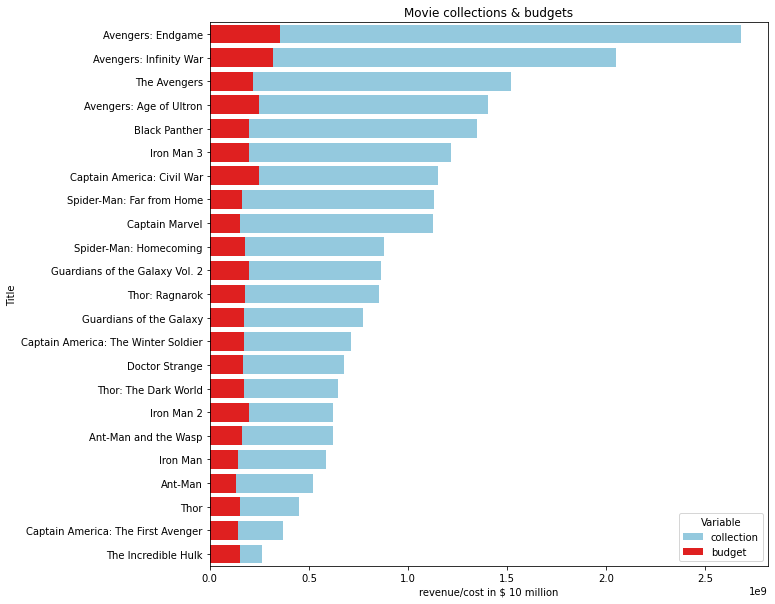

In [126]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = clean_df[["title", "collection","budget"]].sort_values(
    "collection",ascending=False).melt(id_vars='title').rename(columns=str.title)
sns.barplot(y='Title', x='Value', hue='Variable', data=tidy, ax=ax1, palette=["skyblue", "red"],dodge=False)
plt.title("Movie collections & budgets")
plt.xlabel("revenue/cost in $ 10 million")

Seems like "Avengers: Endgame" has gathered most collections but also had the largest budget.<br>
However, to see the profit more clearly, let's make another graph representing return on investment & profit in dollar amount.

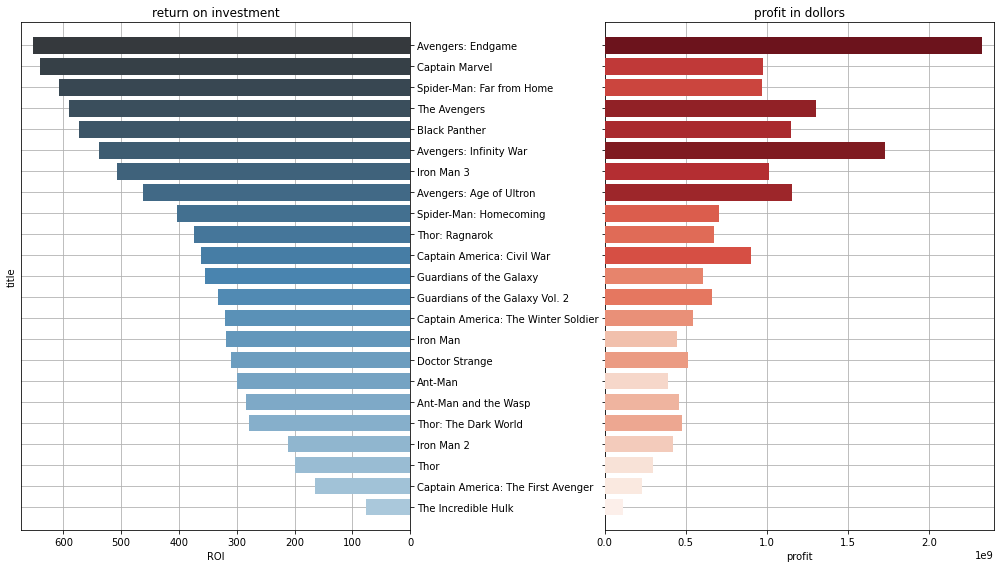

In [127]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

#palette=colors_from_values(clean_df.profit, "Greys_d")

#rank = [int((max(clean_df.profit)-elem)*len(clean_df)/(max(clean_df.profit)+1)) for elem in clean_df.profit] 
#pal = sns.color_palette("Reds_d",len(clean_df))

y = "title"
data = clean_df.sort_values('ROI', ascending=False)

fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(14,8))

sns.barplot("ROI",y=y, data=data, palette="Blues_d", ax=axes[0],zorder=5)
axes[0].set(title='return on investment')

sns.barplot("profit",y=y, data=data, palette="Reds", ax=axes[1],zorder=5,hue="profit",dodge=False)
axes[1].legend_.remove()
axes[1].set(title='profit in dollors')

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
plt.ylabel("")
axes[1].set(yticklabels=[])
plt.ylabel("")

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

plt.show()

Wow. Another win for Endgame. It recorded the biggest ROI, which is over 600%, among all the movies so far. <br>
Also, the movie earned the biggest profit in dollars!. Kudos to Thanos...maybe?<br>

![Dancing Captain America](https://media.giphy.com/media/eMVmYBj2OkoQ35sXHm/giphy.gif)

Other interesting things:
* Although the movie "Avengers: Infinity War" has recorded the 2nd best profit in dollar amount, its ROI is 6th. (Must be expensive to create all the dusty scenes, huh?)
* Iron Man, the very first movie in MCU, has the least collection, ROI and profit. (Your beginnings will seem humble, so prosperous will your future be.)
* Seems like the ROI & collection are much related to the date released.

### Which actor starred the most?

In [128]:
ap_df = clean_df[['title',"actor_1","actor_2","actor_3","actor_4"]]
#display(ap_df.head())

ap_df_2 = pd.DataFrame(columns=['actor_1','actor_2','actor_3','actor_4','actor_total'],index=name_list)
ap_df_2 = ap_df_2.reset_index().rename(columns={"index":"actor"})

for i in range(ap_df_2.actor.count()):
    for column in ["actor_1","actor_2","actor_3","actor_4"]:
        ap_df_2[column][i] = ap_df[ap_df[column] == ap_df_2["actor"][i]].shape[0]
ap_df_2.actor_total = ap_df_2.actor_1 + ap_df_2.actor_2 + ap_df_2.actor_3 + ap_df_2.actor_4
ap_df_2 = ap_df_2.sort_values("actor_total", ascending=True)
display(ap_df_2.head())

,actor,actor_1,actor_2,actor_3,actor_4,actor_total
0,Anthony Hopkins,0,1,0,0,1
23,Jeff Bridges,0,0,0,1,1
24,Jeremy Renner,0,0,0,1,1
50,William Hurt,0,0,0,1,1
26,Liv Tyler,0,1,0,0,1


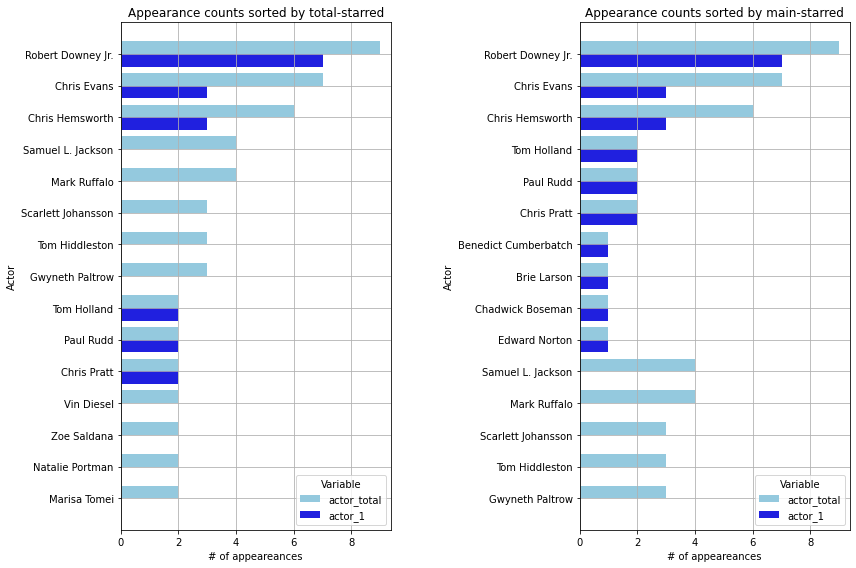

In [129]:
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)
tidy = ap_df_2[["actor", "actor_total", "actor_1"]].sort_values(
    ["actor_total","actor_1"],ascending=False)[:15].melt(id_vars='actor').rename(columns=str.title)
sns.barplot(y='Actor', x='Value', hue='Variable', data=tidy, ax=ax[0], palette=["skyblue", "blue"])
ax[0].set_title('Appearance counts sorted by total-starred')
ax[0].set_xlabel('# of appeareances')


tidy = ap_df_2[["actor", "actor_total", "actor_1"]].sort_values(
    ["actor_1","actor_total"],ascending=False)[:15].melt(id_vars='actor').rename(columns=str.title)
sns.barplot(y='Actor', x='Value', hue='Variable', data=tidy, ax=ax[1], palette=["skyblue", "blue"])
ax[1].set_title('Appearance counts sorted by main-starred')
ax[1].set_xlabel('# of appeareances')

for ax in ax.flat:
    ax.margins(0.04)
    ax.grid(True)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.7)

The top 3 most main-starred actors are the "Big 3" - Robert Downey Jr(Iron Man), Chris Evans(Captain America), Chris Hemsworth(Thor).<br>
Below that, we can see our precious heros(or villans) with 0 solo movies...* <br>
However Black Widow will have her first solo movie this year, and there will be Loki drama, so all is good. <br>

If you sort the data by main appearance, you can see the different pattern.<br>
We can see a lot of 2nd generation heros here. For example, All actors through top 4 ~ top 9 ** are from the new generation.<br>

\* This graph may not represent the 100% accurate reality because it only considered main 4 casts. For example, Hawkeye, who is one of the Big 6, is not on the graph.

** Tom Holland(Spiderman), Paul Rudd(Antman), Chris Pratt(Starlord), Benedict Cumberbatch(Doctor Strange), Brie Larson(Captain Marvel), Chadwick Boseman(Black Panther)

### How is the distribution of genders?

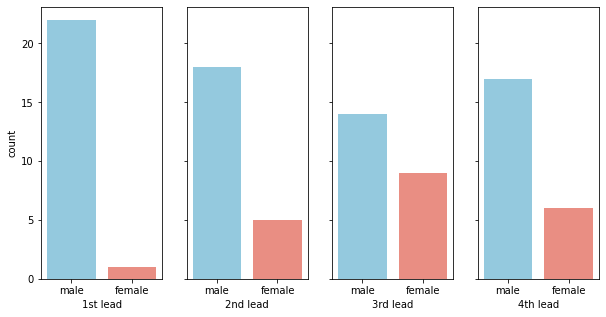

In [130]:
#fig, ax1 = plt.subplots(figsize=(5, 5))
#sns.countplot(y='actor_1_g',  hue='actor_1_g', data=clean_df, ax=ax1)

fig, ax =plt.subplots(1,4,figsize=(10,5),sharey=True)
max_count = max([max(clean_df[i].value_counts()) for i in clean_df.columns])
A=sns.countplot(x=clean_df['actor_1_g'],ax=ax[0], palette=['skyblue','salmon'],
                order=clean_df['actor_1_g'].value_counts().iloc[:2].index)
B=sns.countplot(x=clean_df['actor_2_g'],ax=ax[1], palette=['skyblue','salmon'],
                order=clean_df['actor_2_g'].value_counts().iloc[:2].index)
C=sns.countplot(x=clean_df['actor_3_g'],ax=ax[2], palette=['skyblue','salmon'],
                order=clean_df['actor_3_g'].value_counts().iloc[:2].index)
D=sns.countplot(x=clean_df['actor_4_g'],ax=ax[3], palette=['skyblue','salmon'],
                order=clean_df['actor_4_g'].value_counts().iloc[:2].index)
ax[0].set_xlabel('1st lead')
ax[1].set_xlabel('2nd lead')
ax[2].set_xlabel('3rd lead')
ax[3].set_xlabel('4th lead')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

plt.show()

We can see the clear trend here. All positions in the main cast is male-dominant, but the portion of female cast is slightly increasing through actor1 ~ actor4. <br>
The only female lead character was Captain Marvel by Brie Larson.<br>
Go Captain!
![Captain Marvel Destroying Everything](https://media.giphy.com/media/1kh3Tjz9EBmU3uwpdP/giphy.gif)